# 비비빅 학습동아리 11회차_스터디
 - 2024.10.29.(화) 18:00~20:30
 - 결정트리 원리, 시각화
 - 랜덤포레스트 원리, OOB(out of bag), 앙상블 -> 배깅,  
 - feature_importance

# 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm           # 한글 폰트 깨짐방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['axes.unicode_minus'] = False     # 폰트 깨짐 방지를 위해 음수 기호 설정


# 결정트리 Decision Tree
1. 데이터 준비하기

In [3]:
# 시각화를 통해 트리모델이 작동하는 방식을 알아봅시다.
a = np.linspace(1,100,50)   # 1~100까지 자연수 생성 (1,100,100)은 너무 촘촘해...
x = a

# noise
noise = np.random.normal(0,5, len(a))
y = a + noise

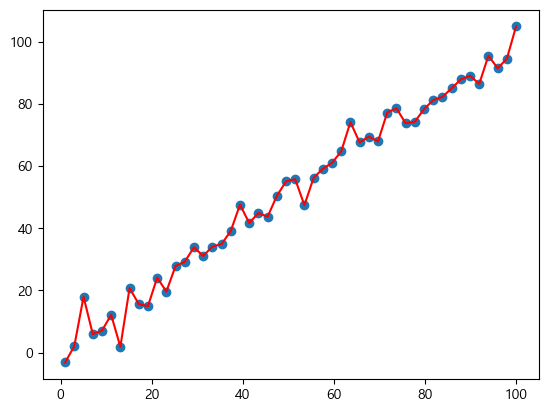

In [4]:
# 데이터의 시각화
plt.scatter(x,y)
plt.plot(x,y, color='red')

2. (비교) 선형회귀 모형

In [5]:
# 선형회귀
from sklearn.linear_model import LinearRegression

In [ ]:
m1 = LinearRegression()
m1.fit(x,y) # 에러가 날겁니다.

##### 행 벡터의 행렬 표현

``` python
# 다음과 같이 생성된 코드는 한 타겟의 features로 취급된다. 
# 하나의 타겟이 50개의 변수를 가지고 있는, 일종의 벡터
a = np.linspace(1,100,50)
```
shape : (50,)
$$
\mathbf{v} = \begin{bmatrix} v_1 & v_2 & v_3 & \cdots & v_n \end{bmatrix}
$$


##### 열 벡터의 행렬 표현

``` python
# rshape(-1,1)로 변환하여 x변수에 대한 50개 타겟의 값으로 인식함
a = np.linspace(1,100,50)
```
shape : (50, 1)
$$
\mathbf{v} = \begin{bmatrix} \begin{bmatrix} v_1    \end{bmatrix} \\
                             \begin{bmatrix} v_2    \end{bmatrix} \\
                             \begin{bmatrix} v_3    \end{bmatrix} \\
                             \begin{bmatrix} \vdots \end{bmatrix} \\
                             \begin{bmatrix} v_n    \end{bmatrix} \end{bmatrix}
$$


In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
m1 = LinearRegression()
m1.fit(x,y)
y_pred1 = m1.predict(x)

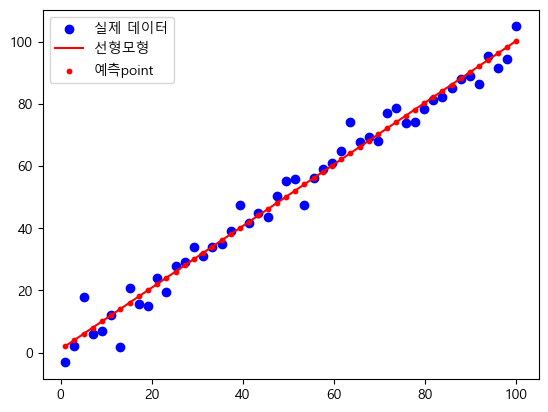

In [8]:
plt.scatter(x, y      , color='blue', label = '실제 데이터')
plt.plot   (x, y_pred1, color='red' , label = '선형모형')
plt.scatter(x, y_pred1, color='red' , label = '예측point', s=10)
plt.legend()

In [44]:
# print(m1.__doc__)
# m1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[1.00033287]]),
 'rank_': 1,
 'singular_': array([206.16579914]),
 'intercept_': array([0.42757785])}

 - 선형모형의 수학적 표현  
$$
\hat{y} = 1.0003  x_0 + 0.4276
$$


2. 결정트리 모델
 - 결정트리는 if문을 작성하는 것으로 이해하면 된다

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
m2 = DecisionTreeRegressor()
m2.fit(x,y)
y_pred2 = m2.predict(x)

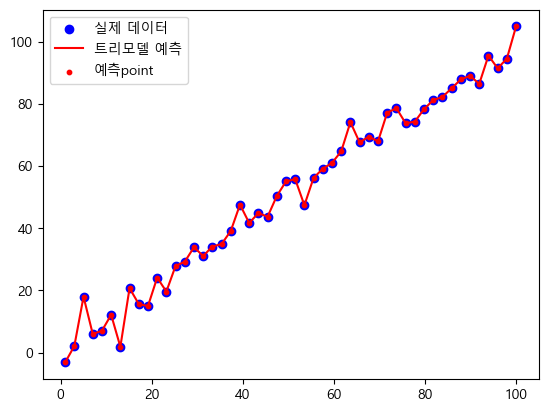

In [10]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
plt.legend()

In [11]:
# if문을 몇개나 만든건지 확인해보자.
m2.get_n_leaves(), len(x)

(50, 50)

과적합이 되었다는 사실을 알 수 있음  
 -> 데이터의 작은 변화에도 예측 결과가 크게 변화됨

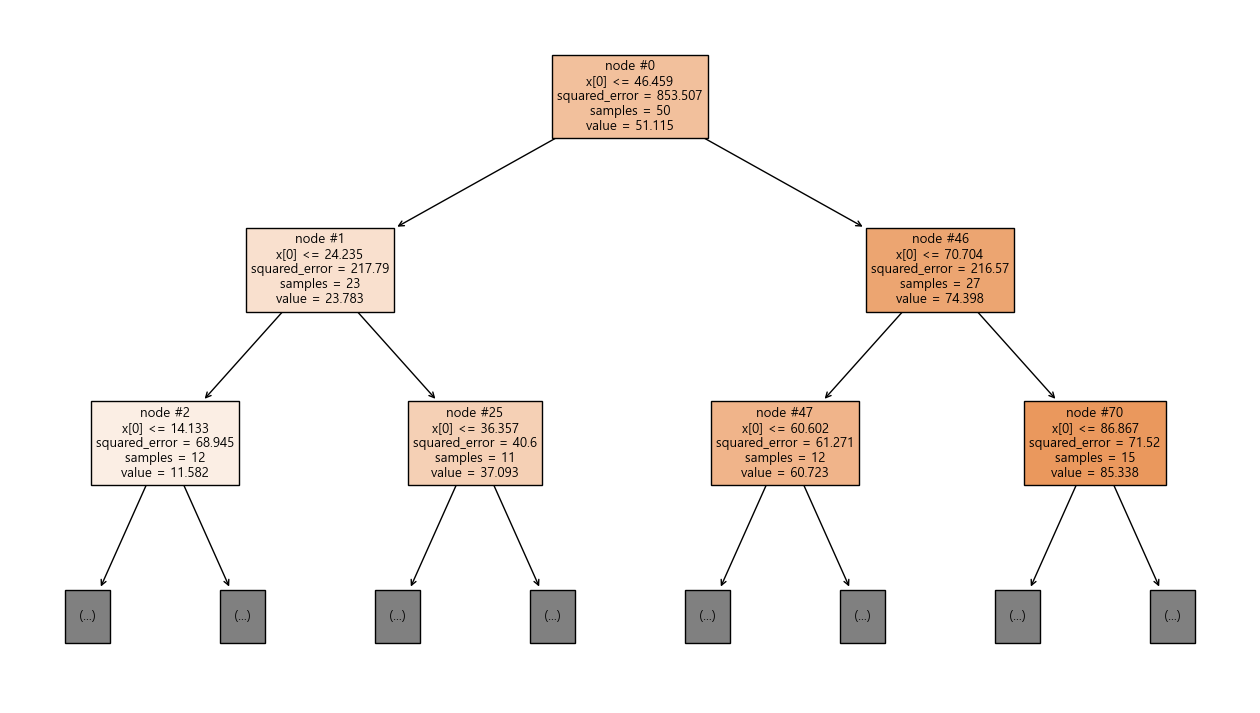

In [12]:
plt.figure(figsize=(16,9))
plot_tree(m2, max_depth=2, filled=True, impurity=True, node_ids=True)
plt.show()

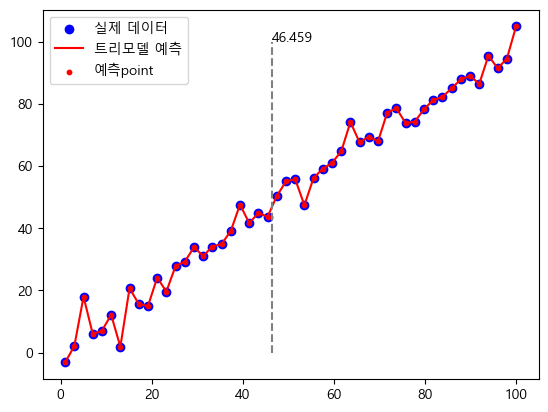

In [14]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
# 노드의 분류기준을 표시
plt.vlines(x=46.459, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=46.459, s='46.459')
plt#
plt.legend()

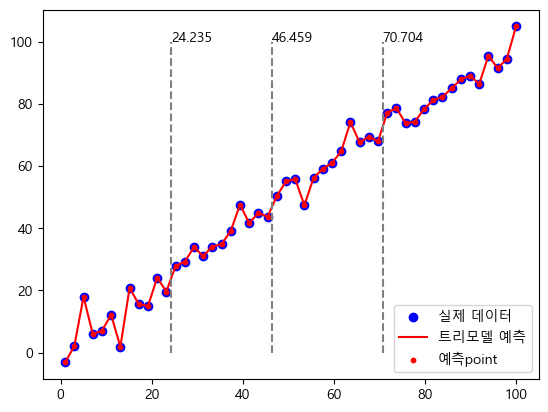

반씩 자르는것 같음...


In [23]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
# 노드의 분류기준을 표시
#0번 노드 
plt.vlines(x=m2.tree_.threshold[0], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[0], s=m2.tree_.threshold[0].round(3))
#1번 노드
plt.vlines(x=m2.tree_.threshold[1], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[1], s=m2.tree_.threshold[1].round(3))
#54번 노드
plt.vlines(x=m2.tree_.threshold[46], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[46], s=m2.tree_.threshold[46].round(3))
plt#
plt.legend( loc="lower right") # , bbox_to_anchor=(1, 0.3) -> 위치를 좀 더 세부적으로 조정가능
plt.show()
print('반씩 자르는것 같음...')

In [24]:
# 맥스 뎁스를 제한해보자.
m3 = DecisionTreeRegressor(max_depth=2)
m3.fit(x,y)
y_pred3 = m3.predict(x)

예측결과는 계단 형태로 이루어집니다.


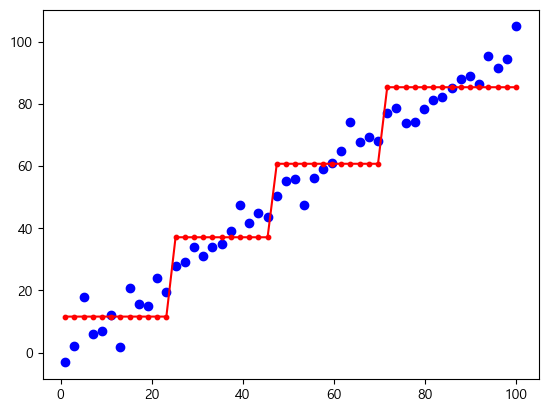

In [25]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')
plt.plot(x, y_pred3, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred3, color='red', s=10,  label = '예측point')
print('예측결과는 계단 형태로 이루어집니다.')

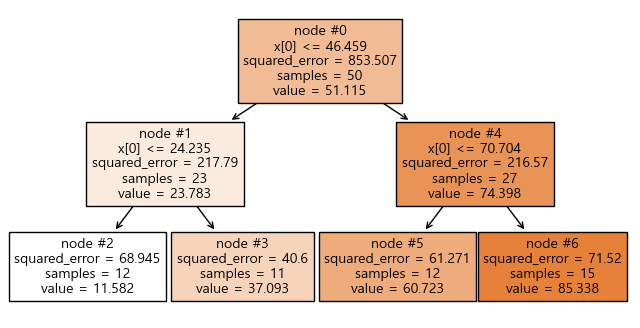

In [27]:
plt.figure(figsize=(8,4))
plot_tree(m3, filled=True, impurity=True, node_ids=True, fontsize=10 )
plt.show()

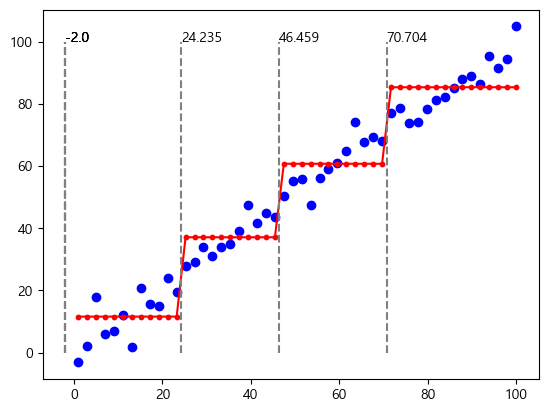

In [31]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred3, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred3, color='red', s=10,  label = '예측point')

# 노드의 분류기준을 표시
for leaf in m3.tree_.threshold:
    plt.vlines(x=leaf, ymin=0, ymax=100, colors='gray', linestyles='--')
    plt.text(y=100, x=leaf, s=leaf.round(3))

#plt.legend()
plt.show()

In [33]:
m3.tree_.threshold # -2는 자식 노드임을 의미

array([46.45918274, 24.23469353, -2.        , -2.        , 70.70408249,
       -2.        , -2.        ])

3. 훈련 데이터셋으로 경험하지 못한 영역에 대한 예측
 - 재학습이 왜 필요한가?
 - 트리모형 결과 해석의 유의점

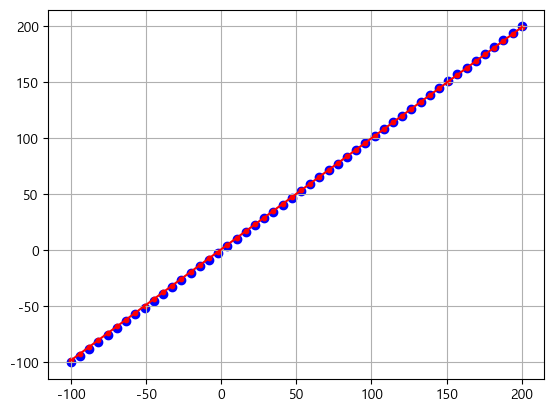

In [34]:
# 만약에 x가 0~100 이 아닌 -100~200 사이의 값이라면?
x2 = np.linspace(-100,200,50).reshape(-1,1)
y2 = x2

y2_pred1 = m1.predict(x2) #선형모형의 

plt.scatter(x2, y2, color='blue',  label = '실제 데이터')
plt.plot(x2, y2_pred1, color='red', label = '트리모델 예측')
plt.scatter(x2, y2_pred1, color='red', s=10,  label = '예측point')
plt.grid()
# 선형모형의 경우 학습 데이터 바깥은 오차가 점점 커지나
# 그래도 어느정도 예측력이 유지됨

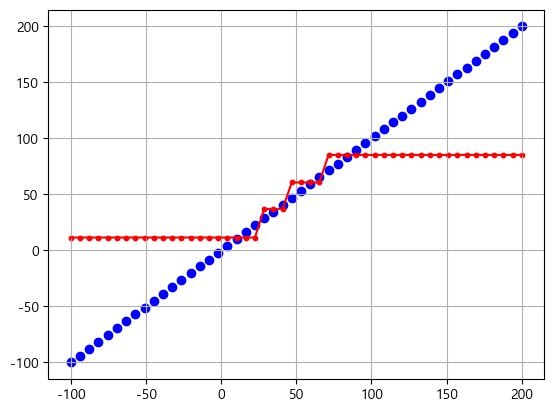

In [35]:
y2_pred2 = m3.predict(x2)

plt.scatter(x2, y2,       color='blue', label = '실제 데이터')
plt.plot   (x2, y2_pred2, color='red',  label = '트리모델 예측')
plt.scatter(x2, y2_pred2, color='red',  label = '예측point', s=10)
plt.grid()
# 결정트리는 완전히 망가져버림

# 랜덤포레스트(RandomForest)
 - 테이블 형태의 데이터 분류, 예측에 가장 좋다고 알려짐(딥러닝 제외)
 - 특징
    - 앙상블: 결정트리 여러 개를 만든다. -> 각 트리로 투표.
    - 데이터(sample)와 특성(feature)를 랜덤 선택 -  OOB(Out of Bag)
      * 특성 선택에 대한 부분은 오늘 다룰 수는 없음
      * 특성 중요도 개별 선택 트리의 불순도 감소 수준의 평균수치로 산출됨 
      * 특성 중요도는 모델 훈련 시마다 바뀔 수 있음  
           -> 다중회귀모형에서의  회귀계수와는 조금 다른 개념
           $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon $$

In [77]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor(
    n_estimators=2,
    max_depth=2)

m4.fit(x,y.ravel())  ##랜포는 1차원 행렬 데이터를 요구 ravel()로 다시 돌려놓자.
y_pred4 = m4.predict(x)

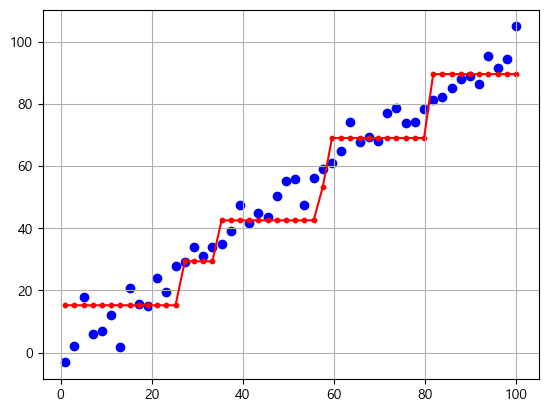

In [63]:
plt.scatter(x, y,       color='blue', label = '실제 데이터')
plt.plot   (x, y_pred4, color='red',  label = '트리모델 예측')
plt.scatter(x, y_pred4, color='red',  label = '예측point', s=10)
plt.grid()

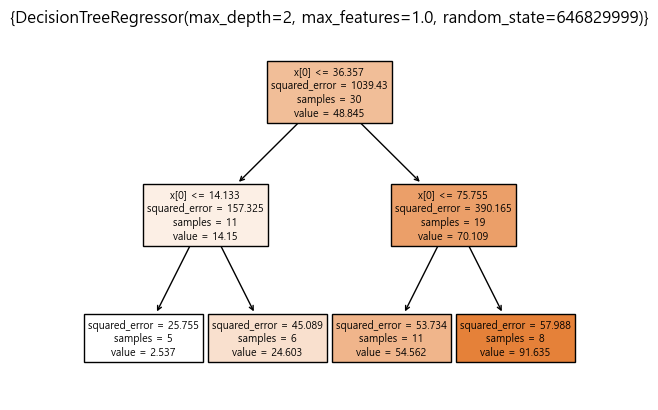

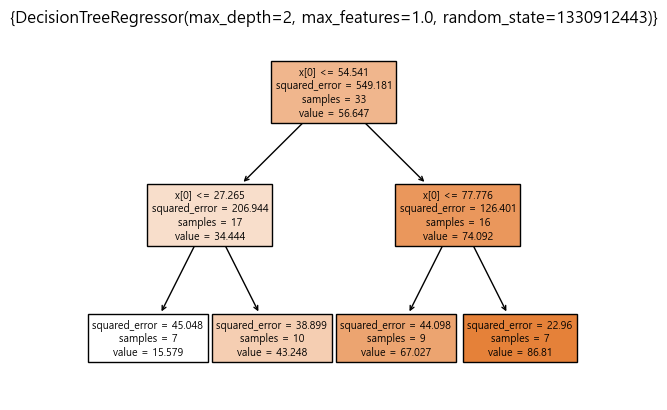

In [86]:
# m4.estimators_ 로 각 결정트리를 확인 가능
for i in m4.estimators_:
    plot_tree(i, filled=True)
    plt.title({i})
    plt.show()

In [ ]:
m4.estimators_[0].

In [45]:
y.ravel().shape, x.ravel().shape

((50,), (50,))

In [47]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트 깨짐 방지를 위해 음수 기호 설정
plt.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import seaborn as sns
import time

# 데이터셋 불러오기

In [25]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 데이터 변환

In [4]:
# 가족 수
train['family'] = train['SibSp'] + train['Parch']
test ['family'] = test ['SibSp'] + test ['Parch']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [5]:
# 혼자인가?
# 람다식으로 한번에
#train['alone'] = train['family'].apply(lambda x: 1 if x == 0 else 0)

## 조건식 -> 0,1 맵핑
train['alone'] = train['family'] == 0
train['alone'] = train['alone'].map({False:0, True:1})

test['alone'] = test['family'] == 0
test['alone'] = test['alone'].map({False:0, True:1})
train
# 참고
## drop 시
# train = train.drop('alone', axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [28]:
# 성별
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
## replace
#train['sex_binary'] = train['Sex'].replace({'male': 0, 'female': 1})
## map
#train['sex_binary'] = train['Sex'].map({'male': 0, 'female': 1})
## lambda
#train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [7]:
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,3,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,1,True,False,False


In [8]:
train['Embarked_C'] = train['Embarked_C'].replace({False:0, True:1})
train['Embarked_Q'] = train['Embarked_Q'].replace({False:0, True:1})
train['Embarked_S'] = train['Embarked_S'].replace({False:0, True:1})

test['Embarked_C'] = test['Embarked_C'].replace({False:0, True:1})
test['Embarked_Q'] = test['Embarked_Q'].replace({False:0, True:1})
test['Embarked_S'] = test['Embarked_S'].replace({False:0, True:1})

train

C:\Users\pooko\AppData\Local\Temp\ipykernel_1740\861949919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked_C'] = train['Embarked_C'].replace({False:0, True:1})
C:\Users\pooko\AppData\Local\Temp\ipykernel_1740\861949919.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked_Q'] = train['Embarked_Q'].replace({False:0, True:1})
C:\Users\pooko\AppData\Local\Temp\ipykernel_1740\861949919.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,1,1,0,0


## pd.cut
 - pd.cut은 데이터를 구간별로 나눌 때 사용 (분포를 고려하지 않음)
 - pd.qcut은 데이터를 나누되, 분포별로 균등하게 나눔
 1~100 까지 숫자가 있다.
 cut 5분할의 경우 1~20, 20~40, ~~~ 80~100 으로 나뉨.
 
 1~100까지 숫자가 정규분포를 따르는 빈도로 구성된다면?
 cut은 위와 동일.
 qcut 5분할의 경우 정규분포에 따라 
 1~30, 30~45, 45~55, ~~~ 70~100 식으로 구성



In [9]:
# age 구간화

train['Age_cat'], bins = pd.cut(train['Age'], 5, retbins=True)  
test['Age_cat'] = pd.cut(test['Age'], bins=bins)
# 각각 cut한 경우, train과 test의 age구간이 달라질 수 있음
# retbins=True 옵션으로 구간을 bins에 저장하고
# test에  bins 옵션으로, train의 연령구간을 그대로 적용한다.

In [10]:
# (참고) pd.qcut 과 pd.cut의 구간 차이 
pd.qcut(train['Age'],5).value_counts(), pd.cut(train['Age'],5).value_counts()

(Age
 (0.419, 19.0]    164
 (31.8, 41.0]     144
 (41.0, 80.0]     142
 (19.0, 25.0]     137
 (25.0, 31.8]     127
 Name: count, dtype: int64,
 Age
 (16.336, 32.252]    346
 (32.252, 48.168]    188
 (0.34, 16.336]      100
 (48.168, 64.084]     69
 (64.084, 80.0]       11
 Name: count, dtype: int64)

<Axes: xlabel='Age'>

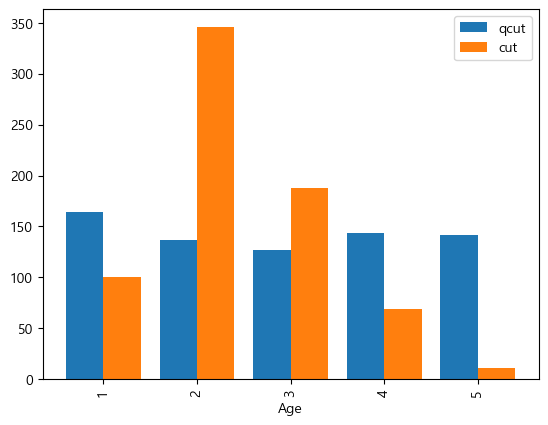

In [11]:
# Age 컬럼을 5개의 구간으로 나누기 (qcut과 cut)
qcut_bins = pd.qcut(train['Age'], 5, labels=[1, 2, 3, 4, 5])
cut_bins = pd.cut(train['Age'], 5, labels=[1, 2, 3, 4, 5])

# 각 구간별 값의 개수를 세기
qcut_counts = qcut_bins.value_counts().sort_index()
cut_counts = cut_bins.value_counts().sort_index()

# 데이터프레임으로 결합 (qcut과 cut 값을 각각 추가)
df_bins = pd.DataFrame({
    'qcut': qcut_counts,
    'cut': cut_counts
    })

# 막대 그래프 그리기
df_bins.plot(kind='bar', width=0.8)

#qcut과 cut의 데이터 분포 차이를 볼 수 있음

C:\Users\pooko\AppData\Local\Temp\ipykernel_1740\3704304366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(train[['Age_cat', 'Survived']].groupby(by='Age_cat').mean().Survived)


<Axes: xlabel='Age_cat', ylabel='Survived'>

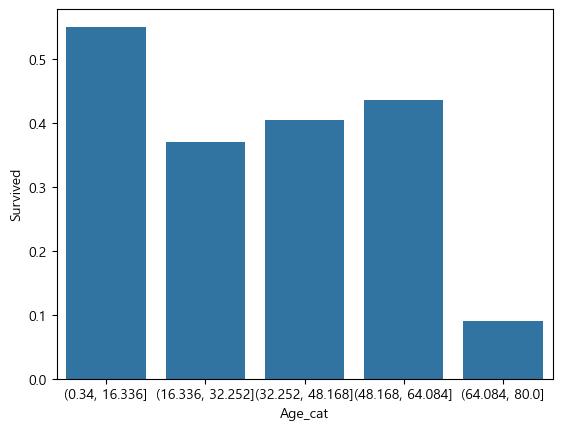

In [12]:
# 연령별 생존확률의 차이
sns.barplot(train[['Age_cat', 'Survived']].groupby(by='Age_cat').mean().Survived)
# 선형적이지는 않으나, 연령대별로 차이를 보임

In [13]:
test['Age_cat'].unique(), '\n' ,train['Age_cat'].unique()

([(32.252, 48.168], (48.168, 64.084], (16.336, 32.252], (0.34, 16.336], NaN, (64.084, 80.0]]
 Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]],
 '\n',
 [(16.336, 32.252], (32.252, 48.168], NaN, (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
 Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]])

In [14]:
# age_cat은 순서가 있으므로 one_hot 인코딩이 아닌 label encoding을 한다.
le = LabelEncoder()
le.fit(train['Age_cat'])
train['Age_cat_le'] = le.transform(train['Age_cat'])
test['Age_cat_le'] = le.transform(test['Age_cat'])
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S,Age_cat,Age_cat_le
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,"(32.252, 48.168]",2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,"(32.252, 48.168]",2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,"(48.168, 64.084]",3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,"(16.336, 32.252]",1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,0,0,0,1,"(16.336, 32.252]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,NaN,5
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,1,1,0,0,"(32.252, 48.168]",2
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,"(32.252, 48.168]",2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,1,0,0,1,NaN,5


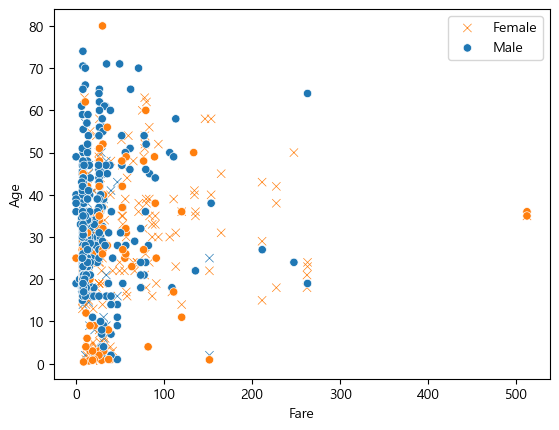

In [15]:
sns.scatterplot(data=train[['Age','Fare','Survived','Sex']][train['Sex'] == 1], 
                x='Fare', y='Age', hue='Survived', marker='x', legend=False, label='Female')
sns.scatterplot(data=train[['Age','Fare','Survived','Sex']][train['Sex'] == 0], 
                x='Fare', y='Age', hue='Survived', marker='o', legend=False, label='Male')

plt.legend()
plt.show()

## cabin 변환

In [16]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
import re
# Cabin 컬럼의 첫 글자 추출 함수
def get_first_letter(cabin):
    if pd.isna(cabin):  # NaN 처리
        return None
    # 공백으로 단어 분리 후 숫자와 연결된 첫 번째 알파벳만 가져오기
    for word in cabin.split():
        match = re.match(r'([A-Za-z])\d+', word)
        if match:
            return match.group(1)
    return None

In [18]:
train['Cabin_first_letter'] = train['Cabin'].apply(get_first_letter)
test['Cabin_first_letter'] = test['Cabin'].apply(get_first_letter)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S,Age_cat,Age_cat_le,Cabin_first_letter
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,"(32.252, 48.168]",2,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,"(32.252, 48.168]",2,None
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,"(48.168, 64.084]",3,None
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,"(16.336, 32.252]",1,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,0,0,0,1,"(16.336, 32.252]",1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,NaN,5,None
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,1,1,0,0,"(32.252, 48.168]",2,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,"(32.252, 48.168]",2,None
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,1,0,0,1,NaN,5,None


In [19]:
# cabin도 label encoding
le = LabelEncoder()
le.fit(train['Cabin_first_letter'])
train['Cabin_le'] = le.transform(train['Cabin_first_letter'])
test ['Cabin_le'] = le.transform(test ['Cabin_first_letter'])
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S,Age_cat,Age_cat_le,Cabin_first_letter,Cabin_le
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,"(32.252, 48.168]",2,None,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,"(32.252, 48.168]",2,None,7
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,"(48.168, 64.084]",3,None,7
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,"(16.336, 32.252]",1,None,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,0,0,0,1,"(16.336, 32.252]",1,None,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,NaN,5,None,7
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,1,1,0,0,"(32.252, 48.168]",2,C,2
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,"(32.252, 48.168]",2,None,7
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,1,0,0,1,NaN,5,None,7


# 데이터선택

In [20]:
train.info(), test.info()
# 데이터 변환이 잘 됐는지 확인
# train 19 columns, test 20 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    int64   
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  family              891 non-null    int64   
 12  alone               891 non-null    int64   
 13  Embarked_C          891 non-null    int64   
 14  Embarked_Q          891 non-null    int64   
 15  Embarked_S          891 non-null    int6

(None, None)

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 모델

In [ ]:
test = pd.read_csv('./data/test.csv')
test

In [31]:
model

RandomForestClassifier()

In [29]:
time.time()
#features = ['Pclass', 'Sex', 'Fare', 'SibSp','Parch', 'Age']
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare']

x = train[features]
y = train['Survived']
x_test = test[features]

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model = RandomForestClassifier()
model.fit(x, y)
pred = model.predict(x_test)

result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
result.to_csv(f'submission{model}{time.time()}.csv', index=False)

In [23]:
train.nunique()


PassengerId           891
Survived                2
Pclass                  3
Name                  891
Sex                     2
Age                    88
SibSp                   7
Parch                   7
Ticket                681
Fare                  248
Cabin                 147
family                  9
alone                   2
Embarked_C              2
Embarked_Q              2
Embarked_S              2
Age_cat                 5
Age_cat_le              6
Cabin_first_letter      7
Cabin_le                8
dtype: int64

In [24]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,alone,Embarked_C,Embarked_Q,Embarked_S,Age_cat,Age_cat_le,Cabin_first_letter,Cabin_le
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,"(32.252, 48.168]",2,None,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,"(32.252, 48.168]",2,None,7
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,"(48.168, 64.084]",3,None,7
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,"(16.336, 32.252]",1,None,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,0,0,0,1,"(16.336, 32.252]",1,None,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,NaN,5,None,7
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,1,1,0,0,"(32.252, 48.168]",2,C,2
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,"(32.252, 48.168]",2,None,7
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0,1,0,0,1,NaN,5,None,7
